In [7]:
import numpy as np 
import pandas as pd
import os
 
%matplotlib inline
# ------ Load iris -----------
iris = pd.read_csv("./data/iris.csv") #load the dataset
print(iris[0:2])

X = iris.iloc[:,1:5] # ignore first column which is row Id
y = iris.iloc[:,5:6] # Classification on the 'Species'

# build train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa


# 9 different classification algorithms

+ Decision tree
+ RandomForest - Ensemble method
+ XGBoost
+ SVM (Support Vector Machine) Classifier
+ Nearest Neighbors Classifier
+ SGD (Stochastic Gradient Descent) classifier
+ Gaussian Naive Bayes
+ MLP (Multi-layer Perceptron) Neural network
+ Gaussian Process Classifier

C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.2

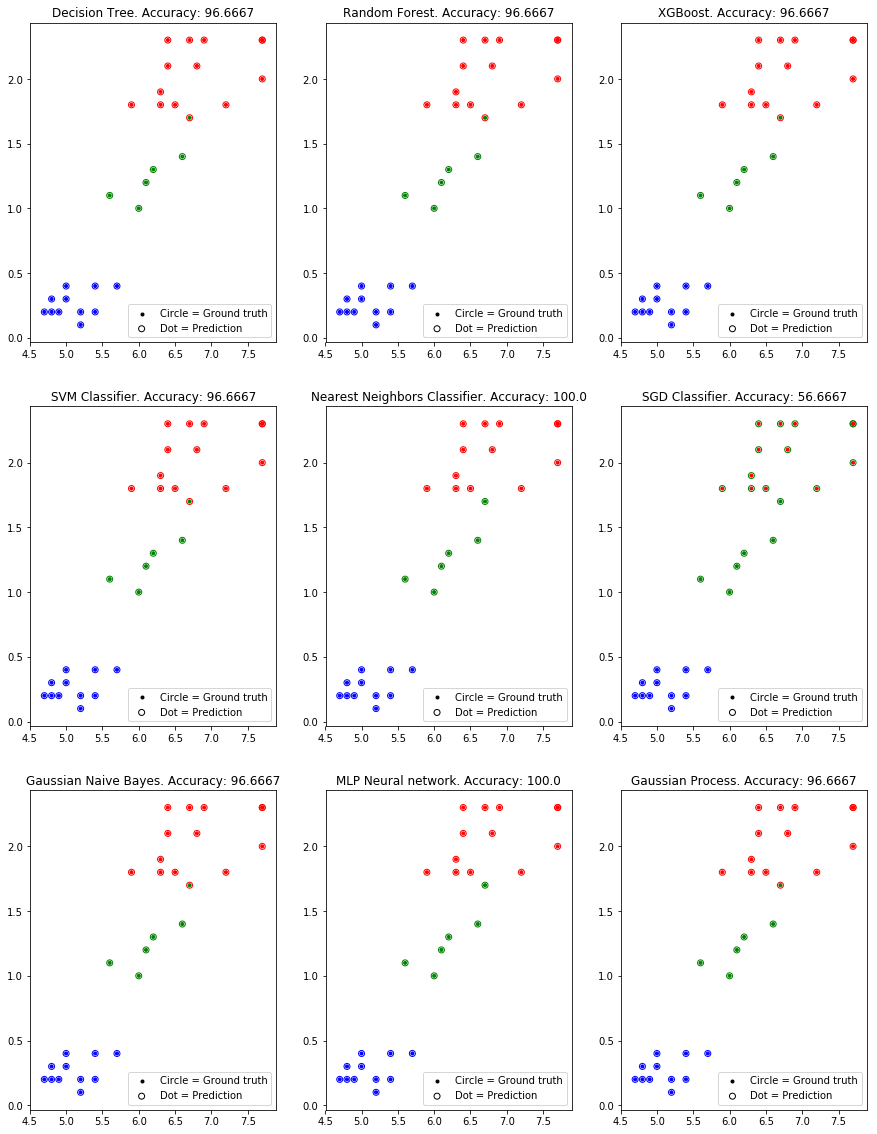

In [5]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(15,20))
axes = fig.subplots(nrows=3, ncols=3)

def run_model(model, alg_name, plot_index):
    # build the model on training data
    model.fit(X_train, y_train.values.reshape(-1,))

    # make predictions for test data
    y_pred = model.predict(X_test)
    # calculate the accuracy score
    accuracy =  accuracy_score(y_test, y_pred) * 100
    
    # Compare the prediction result with ground truth
    color_code = {'Iris-virginica':'red', 'Iris-setosa':'blue', 'Iris-versicolor':'green'}
    plot_index -= 1 
    ax = axes[plot_index//3, plot_index%3]
    
    # plt.figure(plot_index)
#     ax = fig.add_subplot(3,3,plot_index) 
    colors = [color_code[x] for x in y_test.iloc[:,0]]
    ax.scatter(X_test.iloc[:,0], X_test.iloc[:,3], color=colors, marker='.', label='Circle = Ground truth')
    colors = [color_code[x] for x in y_pred]
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:,3], color=colors, marker='o', facecolors='none', label='Dot = Prediction')

    #plt.axes([0.65, 0.65, 0.2, 0.2])
    ax.legend(loc="lower right")
    # manually set legend color to black
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('black')
    leg.legendHandles[1].set_facecolors('none')

    ax.set_title(alg_name + ". Accuracy: " + str(round(accuracy,4)))

# ---- Decision Tree -----------
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
run_model(model, "Decision Tree", 1)

# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
run_model(model, "Random Forest", 2)

# ----- xgboost ------------
# install xgboost
# 'pip install xgboost' or https://stackoverflow.com/questions/33749735/how-to-install-xgboost-package-in-python-windows-platform/39811079#39811079
from xgboost import XGBClassifier

model = XGBClassifier()
run_model(model, "XGBoost", 3)

# ------ SVM Classifier ----------------
from sklearn.svm import SVC

model = SVC()
run_model(model, "SVM Classifier", 4)

# -------- Nearest Neighbors ----------
from sklearn import neighbors

model = neighbors.KNeighborsClassifier()
run_model(model, "Nearest Neighbors Classifier", 5)

# ---------- SGD Classifier -----------------
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(SGDClassifier())
run_model(model, "SGD Classifier", 6)

# --------- Gaussian Naive Bayes ---------
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
run_model(model, "Gaussian Naive Bayes", 7)

# ----------- Neural network - Multi-layer Perceptron  ------------
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
run_model(model, "MLP Neural network", 8)

# ----------- Gaussian Process Classifier  ------------
from sklearn.gaussian_process import GaussianProcessClassifier
model = GaussianProcessClassifier()
run_model(model, "Gaussian Process", 9)